<a href="https://colab.research.google.com/github/geehaad/ML-master-projects/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ELG 5225: Applied Machine Learning 
##Assignment 3
### By:
   - Gehad Hisham Hassan.
   - Kareem Atif Mohamed Bakli. 
   - Kareem Khaled Waly
   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install minisom
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn_som.som import SOM
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from minisom import MiniSom
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.manifold import TSNE
from tqdm import tqdm

# 1. Logistic Regression and K-Nearest Neighbor classifiers

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Assignment3_dataset (1).csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.411765,0.623116,0.573770,0.333333,0.254137,0.380030,0.035440,0.266667,0
1,0.294118,0.542714,0.590164,0.434343,0.088652,0.538003,0.078992,0.200000,0
2,0.058824,0.437186,0.491803,0.373737,0.088652,0.554396,0.184031,0.016667,0
3,0.058824,0.723618,0.672131,0.464646,0.212766,0.687034,0.109735,0.416667,1
4,0.058824,0.557789,0.508197,0.131313,0.215130,0.357675,0.025619,0.033333,0
...,...,...,...,...,...,...,...,...,...
763,0.000000,0.587940,0.655738,0.313131,0.062648,0.673621,0.004697,0.050000,0
764,0.705882,0.422111,0.590164,0.313131,0.000000,0.442623,0.093510,0.416667,1
765,0.352941,0.618090,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0
766,0.058824,0.984925,0.622951,0.363636,0.294326,0.543964,0.340307,0.133333,1


## Split the data set 
First 576 rows (75%) for training and the remaining 192 rows (25%) for
testing

In [ ]:
X = df. loc[:, df. columns !='Outcome']
y = df.Outcome

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)

#Training Score
logistic_training_score = logistic_clf.score(X_train, y_train)
print("Training Score for LR: ",logistic_training_score,'\n-------------')

#Testing Score
logisticc_test_score = logistic_clf.score(X_test, y_test)
print("Testing Score for LR: ",logisticc_test_score)

Training Score for LR:  0.765625 
-------------
Testing Score for LR:  0.765625


##K-Nearest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors_clf = KNeighborsClassifier(n_neighbors = 5)
KNeighbors_clf.fit(X_train, y_train)

#Training Score
KNeighbors_training_score = KNeighbors_clf.score(X_train, y_train)
print("Training Score for K-NN: ",KNeighbors_training_score)

#Testing Score
KNeighbors_test_score = KNeighbors_clf.score(X_test, y_test)
print("Testing Score for K-NN: ", KNeighbors_test_score)



Training Score for K-NN:  0.8177083333333334
Testing Score for K-NN:  0.71875


## TSNE Plots

In [ ]:
def plot_tsne(DataPoints, cluster_model, y, title,title2,n=2):
    tsne_obj = TSNE(n_components=2)
    tsne_model = tsne_obj.fit_transform(DataPoints)
    
    plt.figure(figsize=(17,6))
    
    plt.subplot(1,2,1)
    for clstr in range(n):
        x_points_org = tsne_model[y == clstr, 0]
        y_points_org = tsne_model[y == clstr, 1]
        plt.scatter(x_points_org, y_points_org, label='Cluster'+str(clstr+1))
        plt.plot(np.mean(x_points_org), np.mean(y_points_org), color='yellow', marker='^', markersize=12)
    
    plt.title(title)
    plt.xlabel("TSNE-Component 1")
    plt.ylabel("TSNE-Component 2")
    plt.legend()
    
    plt.subplot(1,2,2)
    for clstr in range(2):
        x_points = tsne_model[cluster_model.predict(DataPoints) == clstr, 0]
        y_points = tsne_model[cluster_model.predict(DataPoints) == clstr, 1]
        plt.scatter(x_points, y_points, label="Cluster "+str(clstr+1))
        plt.plot(np.mean(x_points), np.mean(y_points), color='yellow', marker='^', markersize=12)
    
    plt.title("After Applying "+title2)
    plt.xlabel("TSNE-Component 1")
    plt.ylabel("TSNE-Component 2")
    plt.legend();

### LR TSNE

#### TSNE for training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


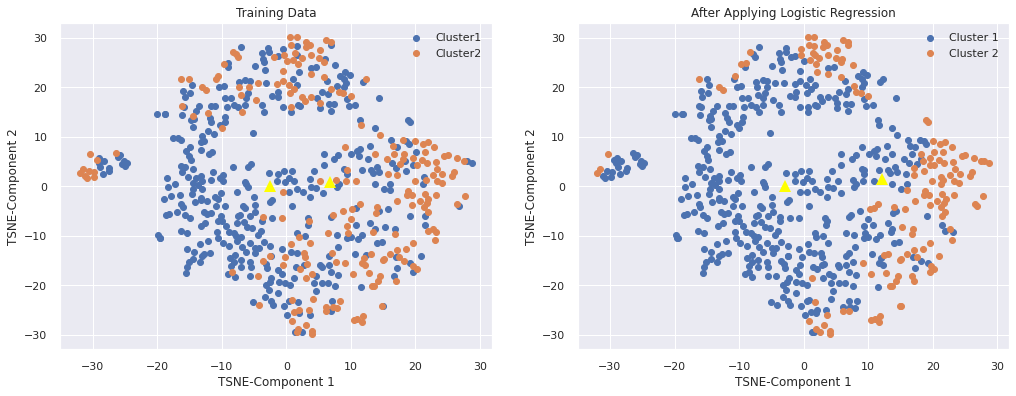

In [ ]:
plot_tsne(X_train,logistic_clf,y_train,"Training Data","Logistic Regression")

#### TSNE for testing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


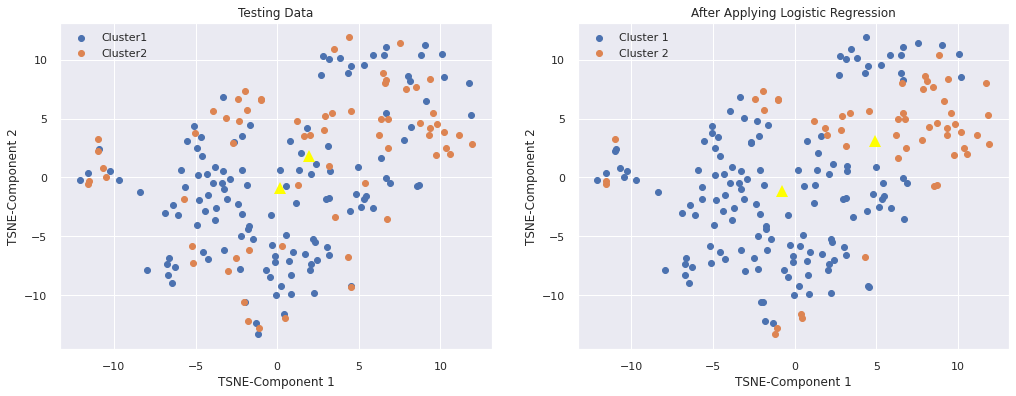

In [ ]:
plot_tsne(X_test,logistic_clf,y_test,"Testing Data","Logistic Regression")

### KNN TSNE

#### TSNE for Training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


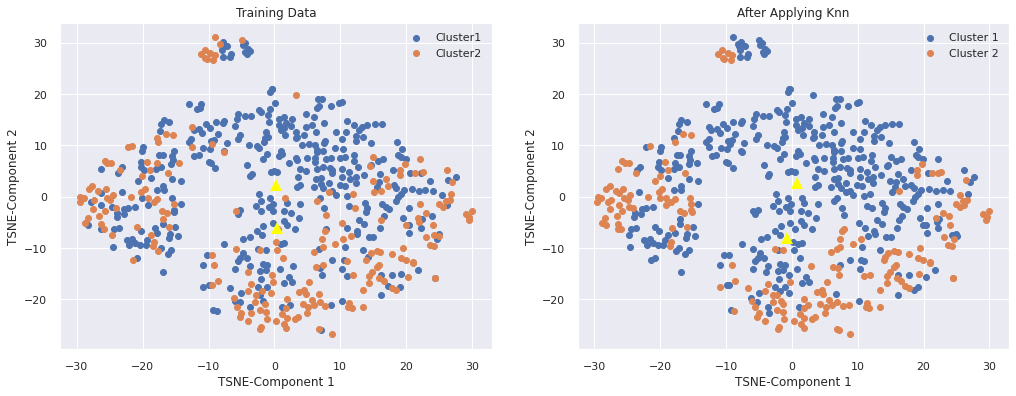

In [ ]:
plot_tsne(X_train,KNeighbors_clf,y_train,"Training Data","Knn")

#### TSNE for Testing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


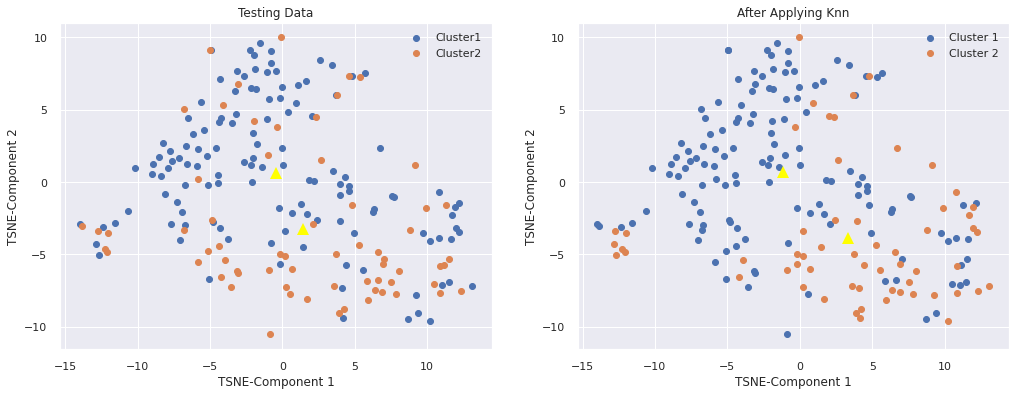

In [ ]:
plot_tsne(X_test,KNeighbors_clf,y_test,"Testing Data","Knn")

# 2.  k-means 

 ## Silhouette score vs the number of clusters

In [ ]:
from sklearn.cluster import KMeans

k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    kmeans_per_k.append(kmeans)

k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


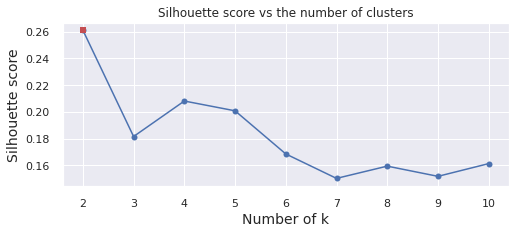

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("Number of k", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.plot(best_k, best_score, "rs")
plt.title('Silhouette score vs the number of clusters')
plt.show()


In [ ]:
silhouette_scores[0] 

0.26114611150604655

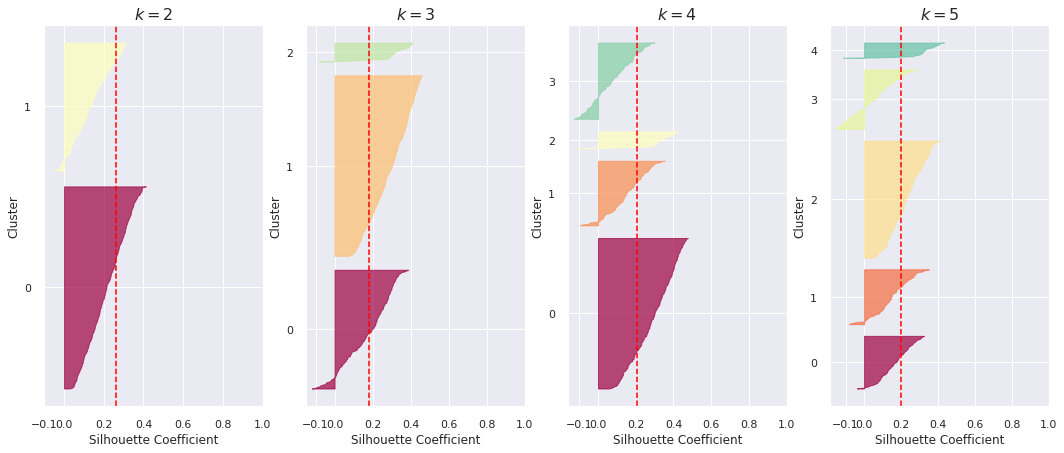

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(18, 7))

for k in (2,3, 4, 5):
    plt.subplot(1, 4, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,3, 4,5):
        plt.ylabel("Cluster")
    
    if k in (2,3,4,5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)
    plt.title('Silhouette score vs the number of clusters')
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

## optimal number of clusters

In [ ]:
best_k

2

## The clustered data with optimum number of clusters

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


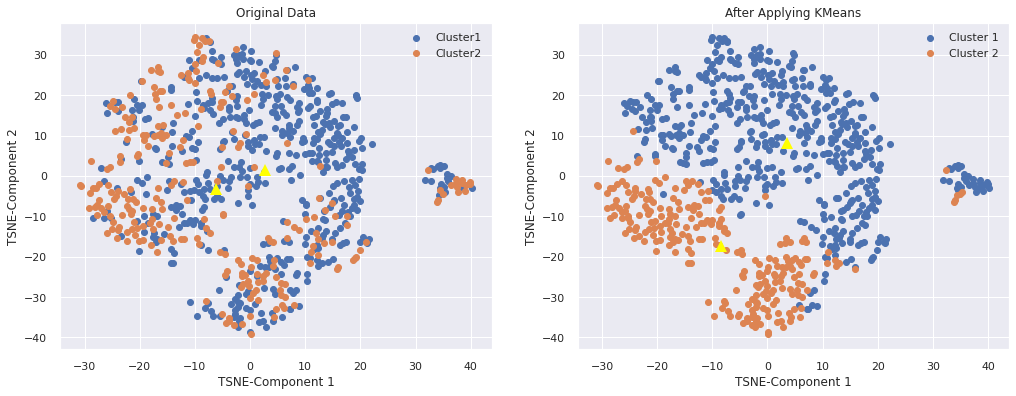

In [ ]:
plot_tsne(X,kmeans,y,"Original Data","KMeans")

#Q3.

#3. Dimensionality Reduction (DR)

Applying PCA on LR and K-NN classifiers to find the best value for n_components.

## Best value for n_components based on LR and KNN  

In [ ]:
def plot_tsne2(X, y,XTest,ytest):
  tsne = TSNE(n_components=2, random_state=0)
  X_2d = tsne.fit_transform(X)
  
  plt.figure(figsize=(17,6))

  plt.subplot(1,2,1)
  for i in range(0,2):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], label="Cluster "+str(i+1))
  plt.title("Training Data")
  plt.xlabel("TSNE Component 1")
  plt.ylabel("TSNE Component 2")
  plt.legend()

  tsne_obj = TSNE(n_components=2)
  tsne_model = tsne_obj.fit_transform(XTest)
    
  plt.subplot(1,2,2)
  for i in range(0,2):
    plt.scatter(XTest[ytest == i, 0], XTest[ytest == i, 1], label="Cluster "+str(i+1))
  plt.title("Testing Data")
  plt.xlabel("TSNE Component 1")
  plt.ylabel("TSNE Component 2")
  plt.legend()
  plt.show()


In [ ]:
from sklearn.decomposition import PCA

def calc_PCA():
  Logistic_train_acc=[]
  Logistic_test_acc=[]
  KNN_train_acc=[]
  KNN_test_acc=[]
  X = df. loc[:, df. columns !='Outcome']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  for i in range(2,9):
    # PCA 
    # Split the data with PCA
    pca = PCA(n_components=i)
    pca.fit(X_train)
    X_trainn=pca.transform(X_train)
    X_testt=pca.transform(X_test)
   
   
    # LR
    logistic_clf = LogisticRegression()
    logistic_clf.fit(X_trainn, y_train)
    logistic_training_score = logistic_clf.score(X_trainn, y_train)
    logistic_test_score = logistic_clf.score(X_testt, y_test)
    print("_________________________")
    print("|At PCA n_components=",i,"|")
    print("_________________________\n")

    print("Training_score for Logistic Regression is:",logistic_training_score)
    print("Testing_score for Logistic Regression is:",logistic_test_score)
    print('\n',"*************")
    Logistic_train_acc.append(logistic_training_score)
    Logistic_test_acc.append(logistic_test_score)

    # KNN 
    Knn_clf = KNeighborsClassifier(n_neighbors = 5)
    Knn_clf.fit(X_trainn, y_train)
    Knn_training_score = Knn_clf.score(X_trainn, y_train)
    Knn_test_score = Knn_clf.score(X_testt, y_test)

    print("Training_score for KNN is:",Knn_training_score)
    print("Testing_score for KNN is:",Knn_test_score,'\n')
    KNN_train_acc.append(Knn_training_score)
    KNN_test_acc.append(Knn_test_score)
    
    plot_tsne2(X_trainn,y_train,X_testt,y_test)

  return Logistic_test_acc, KNN_test_acc

_________________________
|At PCA n_components= 2 |
_________________________

Training_score for Logistic Regression is: 0.7326388888888888
Testing_score for Logistic Regression is: 0.703125

 *************
Training_score for KNN is: 0.7795138888888888
Testing_score for KNN is: 0.6666666666666666 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


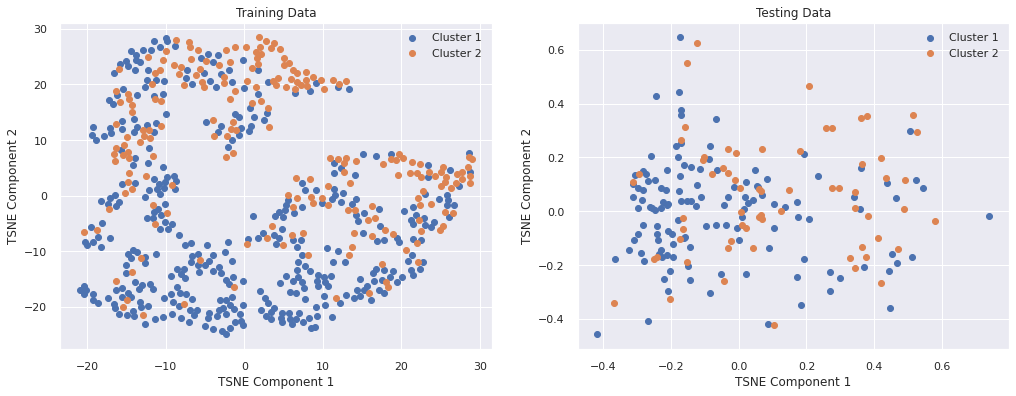

_________________________
|At PCA n_components= 3 |
_________________________

Training_score for Logistic Regression is: 0.7274305555555556
Testing_score for Logistic Regression is: 0.7239583333333334

 *************
Training_score for KNN is: 0.8142361111111112
Testing_score for KNN is: 0.7135416666666666 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


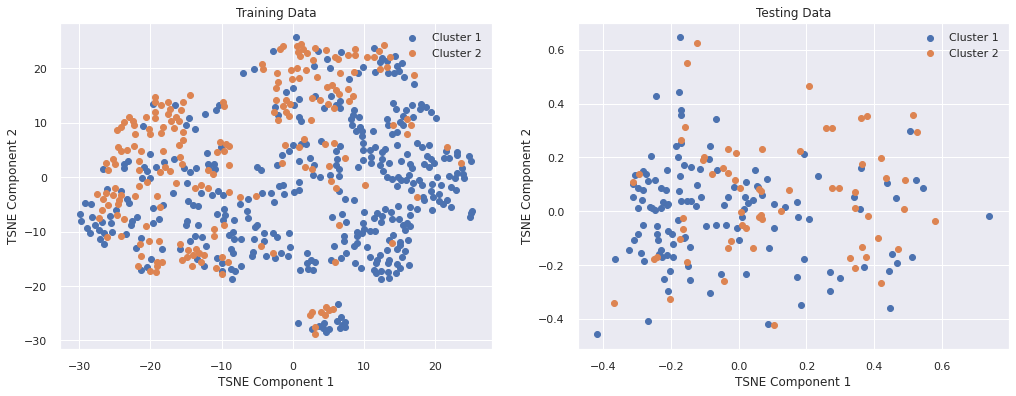

_________________________
|At PCA n_components= 4 |
_________________________

Training_score for Logistic Regression is: 0.7291666666666666
Testing_score for Logistic Regression is: 0.7291666666666666

 *************
Training_score for KNN is: 0.8020833333333334
Testing_score for KNN is: 0.7239583333333334 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


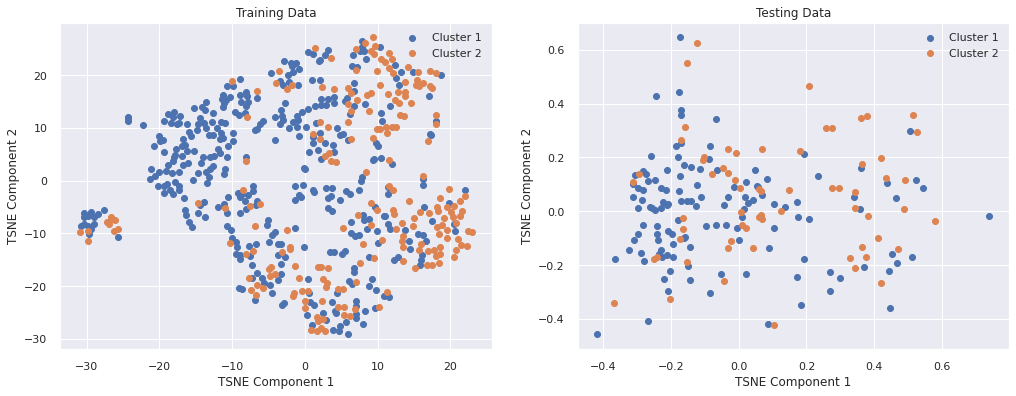

_________________________
|At PCA n_components= 5 |
_________________________

Training_score for Logistic Regression is: 0.7291666666666666
Testing_score for Logistic Regression is: 0.7447916666666666

 *************
Training_score for KNN is: 0.8020833333333334
Testing_score for KNN is: 0.7239583333333334 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


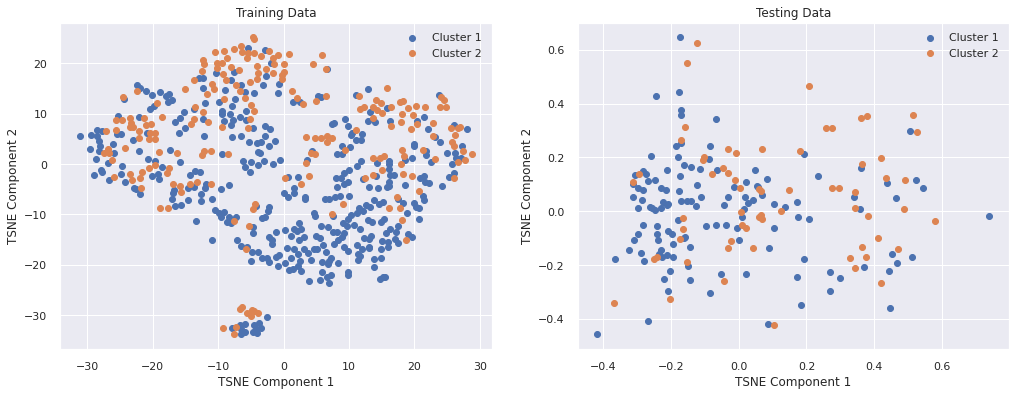

_________________________
|At PCA n_components= 6 |
_________________________

Training_score for Logistic Regression is: 0.7447916666666666
Testing_score for Logistic Regression is: 0.7708333333333334

 *************
Training_score for KNN is: 0.8125
Testing_score for KNN is: 0.7291666666666666 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


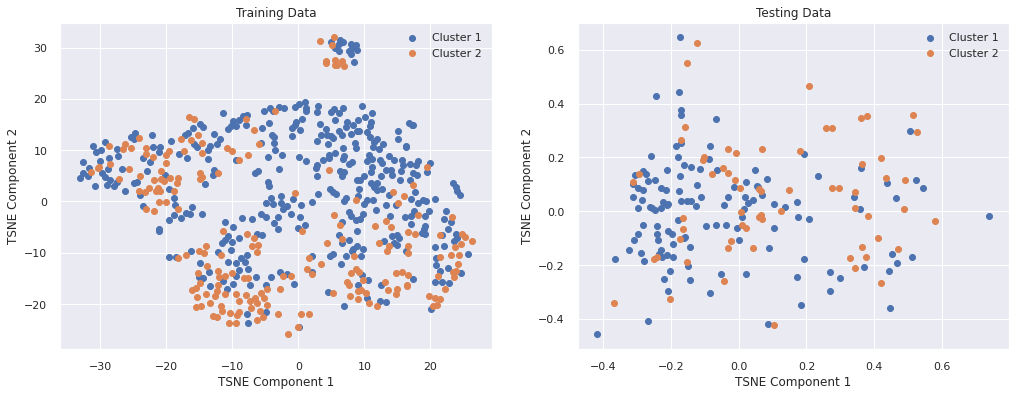

_________________________
|At PCA n_components= 7 |
_________________________

Training_score for Logistic Regression is: 0.765625
Testing_score for Logistic Regression is: 0.7708333333333334

 *************
Training_score for KNN is: 0.8107638888888888
Testing_score for KNN is: 0.75 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


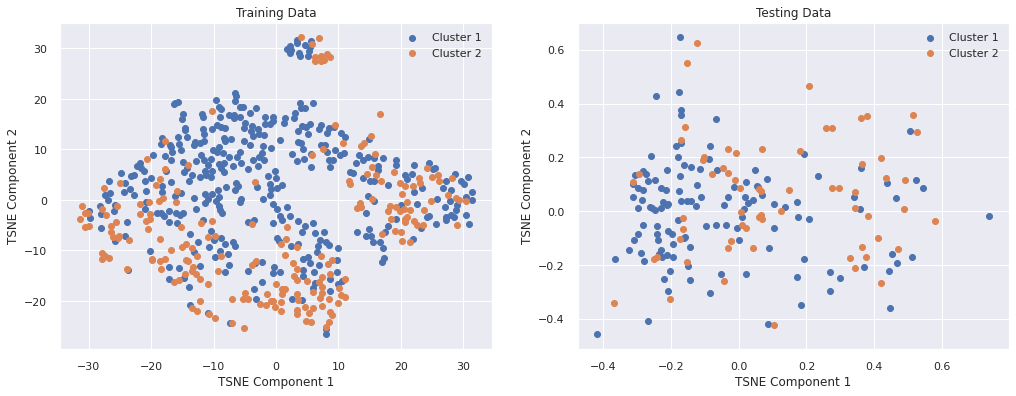

_________________________
|At PCA n_components= 8 |
_________________________

Training_score for Logistic Regression is: 0.765625
Testing_score for Logistic Regression is: 0.765625

 *************
Training_score for KNN is: 0.8177083333333334
Testing_score for KNN is: 0.71875 



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


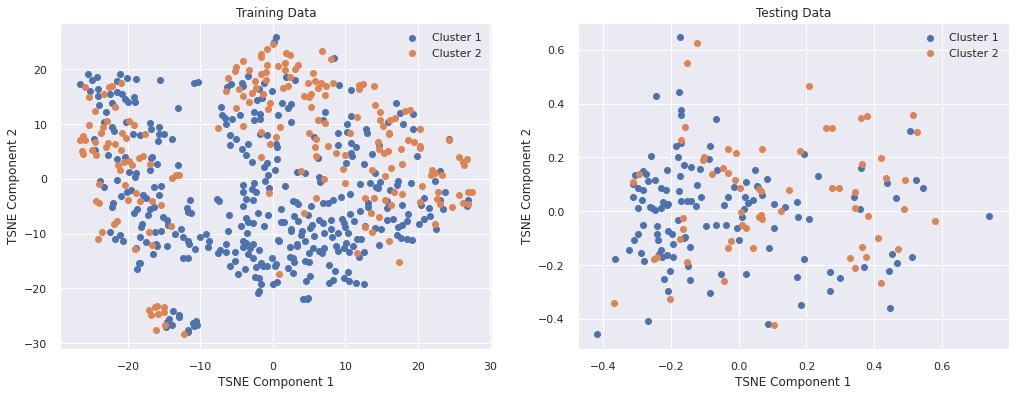

In [ ]:
Logistic_test_acc,KNN_test_acc=calc_PCA()

In [ ]:
best_n_for_logistic=np.argmax(Logistic_test_acc)+2
best_n_for_Knn=np.argmax(KNN_test_acc)+2
print("Best number n_component of PCA for Knn is:",best_n_for_Knn)
print("Best number n_component of PCA for Logistic Regression is:",best_n_for_logistic)

Best number n_component of PCA for Knn is: 7
Best number n_component of PCA for Logistic Regression is: 6


## Number of features-accuracy Graph with baseline performances

In [ ]:
pca = PCA(n_components=best_n_for_logistic)

pca.fit(X_train)
X_train_RL=pca.transform(X_train)
X_testt=pca.transform(X_test)
# LR
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train_RL, y_train)
logistic_training_score = logistic_clf.score(X_train_RL, y_train)
logistic_test_score = logistic_clf.score(X_testt, y_test)
print("_________________________")
print("|At PCA n_components=",best_n_for_logistic,"|")
print("_________________________\n")

print("Training_score for Logistic Regression is:",logistic_training_score)
print("Testing_score for Logistic Regression is:",logistic_test_score)
print('\n',"*************")


# KNN 
pca = PCA(n_components=best_n_for_Knn)
pca.fit(X_train)
X_train_knn=pca.transform(X_train)
X_test_Knn=pca.transform(X_test)

# Split the data with PCA

Knn_clf = KNeighborsClassifier(n_neighbors = 5)
Knn_clf.fit(X_train_knn, y_train)
Knn_training_score = Knn_clf.score(X_train_knn, y_train)
Knn_test_scoree = Knn_clf.score(X_test_Knn, y_test)
print("_________________________")
print("|At PCA n_components=",best_n_for_Knn,"|")
print("_________________________\n")
print("Training_score for KNN is:",Knn_training_score)
print("Testing_score for KNN is:",Knn_test_scoree,'\n')

_________________________
|At PCA n_components= 6 |
_________________________

Training_score for Logistic Regression is: 0.7447916666666666
Testing_score for Logistic Regression is: 0.7708333333333334

 *************
_________________________
|At PCA n_components= 7 |
_________________________

Training_score for KNN is: 0.8107638888888888
Testing_score for KNN is: 0.75 



Test Accuracy Vs Number of components of PCA with Knn and Logistic



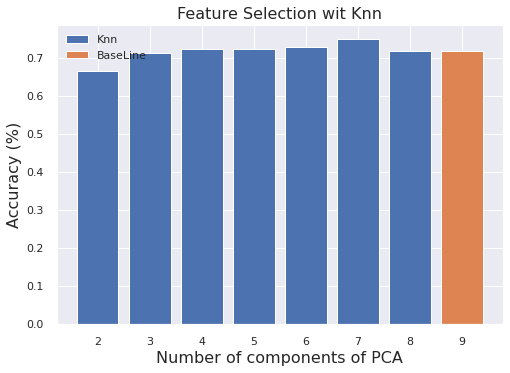

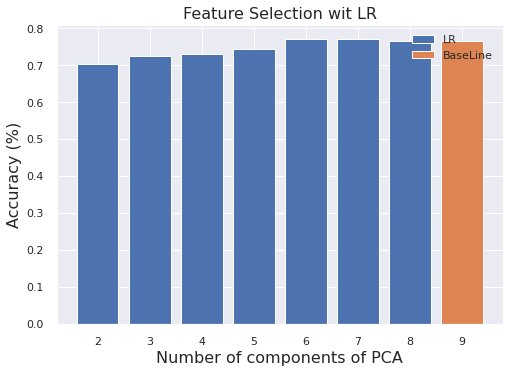

In [ ]:
print('Test Accuracy Vs Number of components of PCA with Knn and Logistic\n')

# Knn
plt.bar(range(2, 9), KNN_test_acc, label="Knn")
plt.bar(9,KNeighbors_test_score, label="BaseLine")

Title = "Feature Selection wit Knn"
plt.title(Title, fontsize=16)
plt.xlabel("Number of components of PCA", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()
  
#LR
plt.bar(range(2, 9),Logistic_test_acc, label="LR")
plt.bar(9,logisticc_test_score, label="BaseLine")

Title = "Feature Selection wit LR"
plt.title(Title, fontsize=16)
plt.xlabel("Number of components of PCA", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.legend()
plt.show()


##TSNE plots with PCA

### KNN TSNE

#### TSNE for training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


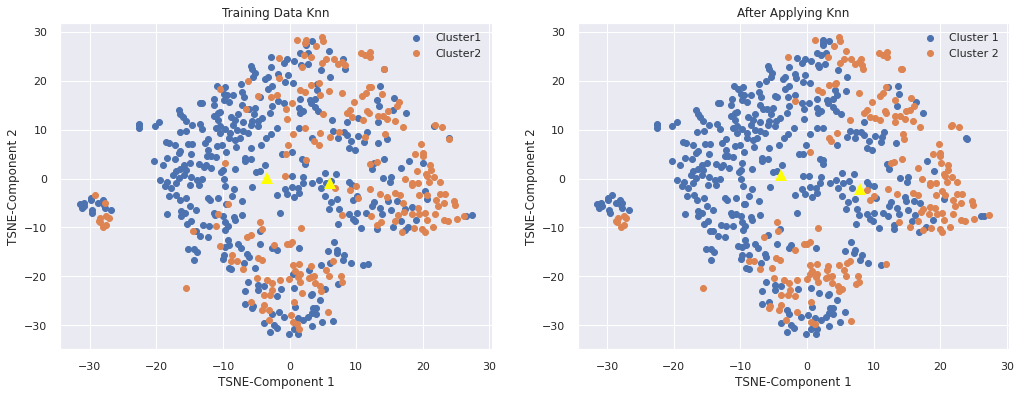

In [ ]:
plot_tsne(X_train_knn,Knn_clf,y_train,"Training Data Knn","Knn")

#### TSNE for testing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


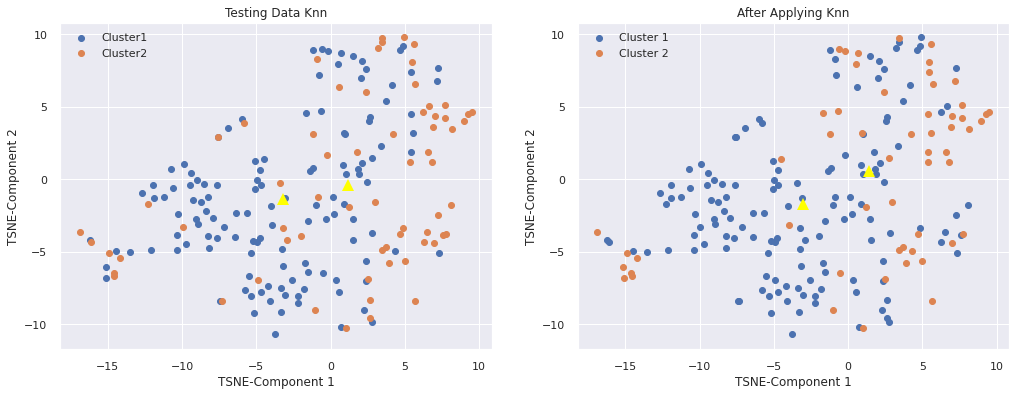

In [ ]:
plot_tsne(X_test_Knn,Knn_clf,y_test,"Testing Data Knn","Knn")

### LR TSNE 

#### TSNE for training

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


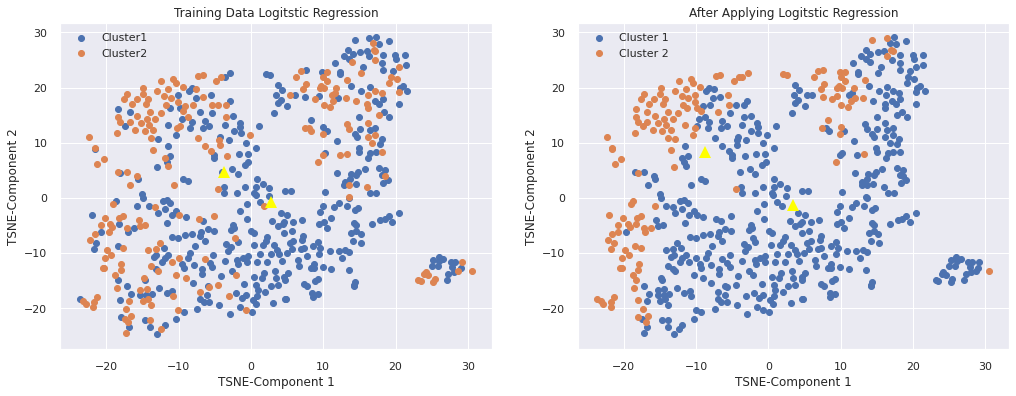

In [ ]:
plot_tsne(X_train_RL,logistic_clf,y_train,"Training Data Logitstic Regression","Logitstic Regression")

#### TSNE for testing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


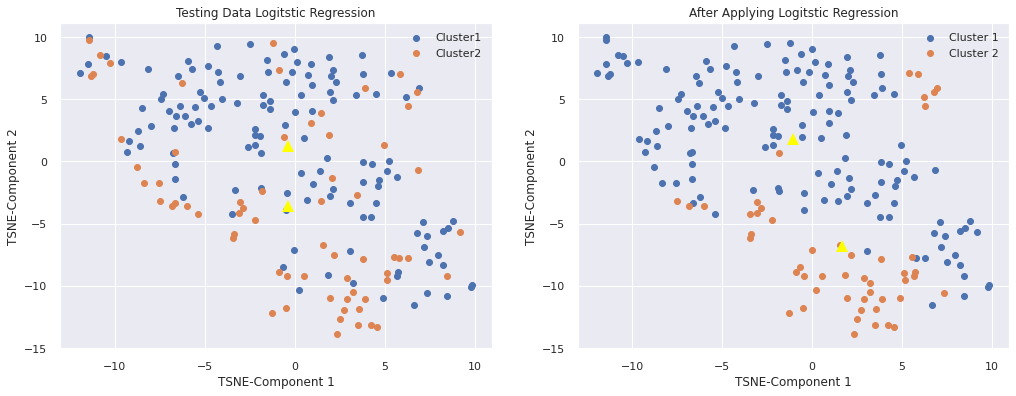

In [ ]:
plot_tsne(X_testt,logistic_clf,y_test,"Testing Data Logitstic Regression","Logitstic Regression")

#Q4


## Filter Methods :

1.   Information Gain
2.   Variance Threshold


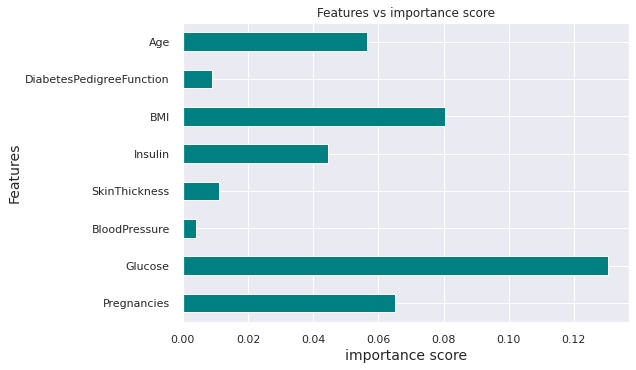

In [ ]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importance = pd.Series(importances,df.columns[0:len(df.columns)-1])
feat_importance.plot(kind='barh',color='teal')
plt.title('Features vs importance score')
plt.ylabel("Features", fontsize=14)
plt.xlabel("importance score", fontsize=14)
plt.show()

In [ ]:
inf_dic = dict(zip(df.columns[0:len(df.columns)-1], importances))

In [ ]:
inf_dic

{'Age': 0.05665594038617017,
 'BMI': 0.08051012927008094,
 'BloodPressure': 0.0040850623238719574,
 'DiabetesPedigreeFunction': 0.00883112922232221,
 'Glucose': 0.13046231015251752,
 'Insulin': 0.044414250222209795,
 'Pregnancies': 0.06524940396649215,
 'SkinThickness': 0.011206119792012137}

In [ ]:
from operator import itemgetter

In [ ]:
dic2=sorted(inf_dic.items(), key=itemgetter(1),reverse=True)

In [ ]:
asd=pd.DataFrame(dic2)

In [ ]:
lst=asd[0]

In [ ]:
lst=lst.tolist()

In [ ]:
lst

['Glucose',
 'BMI',
 'Pregnancies',
 'Age',
 'Insulin',
 'SkinThickness',
 'DiabetesPedigreeFunction',
 'BloodPressure']

In [ ]:
Logistic_train_acc=[]
Logistic_test_acc=[]
KNN_train_acc=[]
KNN_test_acc=[]
for i in range(1,9):
  X_Features=df[lst[0:i]]
  X_train, X_test, y_train, y_test = train_test_split(X_Features, y, test_size=0.25, random_state=0)
  #LR
  logistic_clf = LogisticRegression()
  logistic_clf.fit(X_train, y_train)
  logistic_training_score = logistic_clf.score(X_train, y_train)
  logistic_test_score = logistic_clf.score(X_test, y_test)
  print("_________________________")
  print("|At Best",i," Features using Information gain")
  print("_________________________\n")
  print("Training_score for Logistic Regression is:",logistic_training_score)
  print("Testing_score for Logistic Regression is:",logistic_test_score)
  print('\n',"*************")
  Logistic_train_acc.append(logistic_training_score)
  Logistic_test_acc.append(logistic_test_score)
  
  #Knn
  Knn_clf = KNeighborsClassifier(n_neighbors = 5)
  Knn_clf.fit(X_train, y_train)
  Knn_training_score = Knn_clf.score(X_train, y_train)
  Knn_test_score = Knn_clf.score(X_test, y_test)
  print("Training_score for KNN is:",Knn_training_score)
  print("Testing_score for KNN is:",Knn_test_score,'\n')
  KNN_train_acc.append(Knn_training_score)
  KNN_test_acc.append(Knn_test_score)


def plot(y_datapoints,title,baseline,title2):
  plt.bar(range(1, 9), y_datapoints, label=title2)
  plt.bar(9,baseline, label="BaseLine")

  Title = title
  plt.title(Title, fontsize=16)
  plt.xlabel("n_features", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)
  plt.xlim(1,9)
  plt.legend()
  plt.show()


_________________________
|At Best 1  Features using Information gain
_________________________

Training_score for Logistic Regression is: 0.7326388888888888
Testing_score for Logistic Regression is: 0.7760416666666666

 *************
Training_score for KNN is: 0.7586805555555556
Testing_score for KNN is: 0.7395833333333334 

_________________________
|At Best 2  Features using Information gain
_________________________

Training_score for Logistic Regression is: 0.75
Testing_score for Logistic Regression is: 0.7708333333333334

 *************
Training_score for KNN is: 0.8125
Testing_score for KNN is: 0.7395833333333334 

_________________________
|At Best 3  Features using Information gain
_________________________

Training_score for Logistic Regression is: 0.7604166666666666
Testing_score for Logistic Regression is: 0.7760416666666666

 *************
Training_score for KNN is: 0.8107638888888888
Testing_score for KNN is: 0.7552083333333334 

_________________________
|At Best 4  F

In [ ]:
best_n_for_logistic=np.argmax(Logistic_test_acc)+1
best_n_for_Knn=np.argmax(KNN_test_acc)+1
print("Best number of features for Knn is:",best_n_for_Knn)
print("Best number of features for Logistic Regression is:",best_n_for_logistic)

Best number of features for Knn is: 3
Best number of features for Logistic Regression is: 5


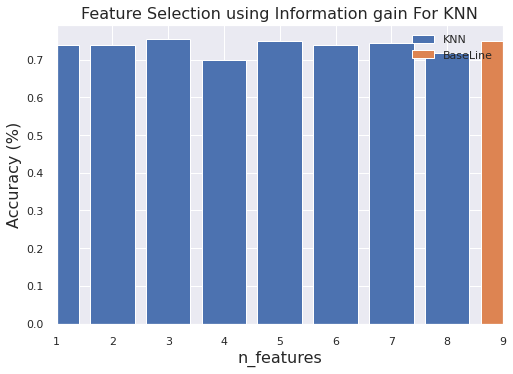

In [ ]:
plot(KNN_test_acc,"Feature Selection using Information gain For KNN",Knn_test_scoree,"KNN")

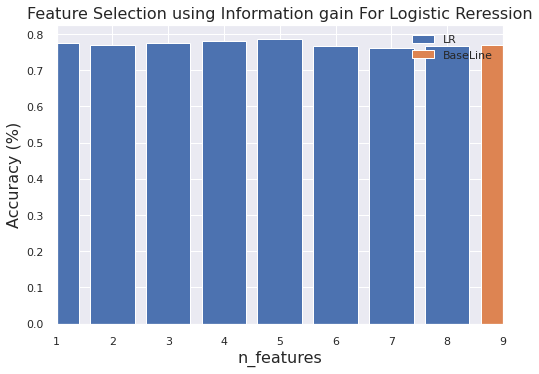

In [ ]:
plot(Logistic_test_acc,"Feature Selection using Information gain For Logistic Reression",logistic_test_scoree,"LR")

## Wrapper Method:


1.   Forward Feature Elimination




### Forward Feature Elimination

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

Logistic_train_acc=[]
Logistic_test_acc=[]
KNN_train_acc=[]
KNN_test_acc=[]
for i in range(1,8):
  sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = i, cv =10, direction ='forward')
  sfs_selector.fit(X, y)
  X.columns[sfs_selector.get_support()]
  lstt=X.columns[sfs_selector.get_support()].tolist()
  X_Features=df[lstt[0:i]]
  X_train, X_test, y_train, y_test = train_test_split(X_Features, y, test_size=0.25, random_state=0)
  #LR
  logistic_clf = LogisticRegression()
  logistic_clf.fit(X_train, y_train)
  logistic_training_score = logistic_clf.score(X_train, y_train)
  logistic_test_score = logistic_clf.score(X_test, y_test)
  print("_________________________")
  print("|At Best",i," Features using Forward Elimination")
  print("_________________________\n")
  print("Training_score for Logistic Regression is:",logistic_training_score)
  print("Testing_score for Logistic Regression is:",logistic_test_score)
  print('\n')
  Logistic_train_acc.append(logistic_training_score)
  Logistic_test_acc.append(logistic_test_score)
  
  #Knn
  Knn_clf = KNeighborsClassifier(n_neighbors = 5)
  Knn_clf.fit(X_train, y_train)
  Knn_training_score = Knn_clf.score(X_train, y_train)
  Knn_test_score = Knn_clf.score(X_test, y_test)
  print("Training_score for KNN is:",Knn_training_score)
  print("Testing_score for KNN is:",Knn_test_score,'\n')
  KNN_train_acc.append(Knn_training_score)
  KNN_test_acc.append(Knn_test_score)
Logistic_test_acc.append(logisticc_test_score)
KNN_test_acc.append(KNeighbors_test_score)
def plot2(y_datapoints,title,baseline,title2):
  plt.bar(range(1, 9), y_datapoints, label=title2)
  plt.bar(9,baseline, label="BaseLine")
  Title = title
  plt.title(Title, fontsize=16)
  plt.xlabel("n_features", fontsize=16)
  plt.ylabel("Accuracy (%)", fontsize=16)
  plt.legend()
  plt.show()

_________________________
|At Best 1  Features using Forward Elimination
_________________________

Training_score for Logistic Regression is: 0.7326388888888888
Testing_score for Logistic Regression is: 0.7760416666666666


Training_score for KNN is: 0.7586805555555556
Testing_score for KNN is: 0.7395833333333334 

_________________________
|At Best 2  Features using Forward Elimination
_________________________

Training_score for Logistic Regression is: 0.75
Testing_score for Logistic Regression is: 0.7708333333333334


Training_score for KNN is: 0.8125
Testing_score for KNN is: 0.7395833333333334 

_________________________
|At Best 3  Features using Forward Elimination
_________________________

Training_score for Logistic Regression is: 0.7690972222222222
Testing_score for Logistic Regression is: 0.7760416666666666


Training_score for KNN is: 0.8072916666666666
Testing_score for KNN is: 0.7604166666666666 

_________________________
|At Best 4  Features using Forward Elimination

In [ ]:
best_n_for_logistic=np.argmax(Logistic_test_acc)+1
best_n_for_Knn=np.argmax(KNN_test_acc)+1
print("Best number of features for Knn is:",best_n_for_Knn)
print("Best number of features for Logistic Regression is:",best_n_for_logistic)

Best number of features for Knn is: 3
Best number of features for Logistic Regression is: 6


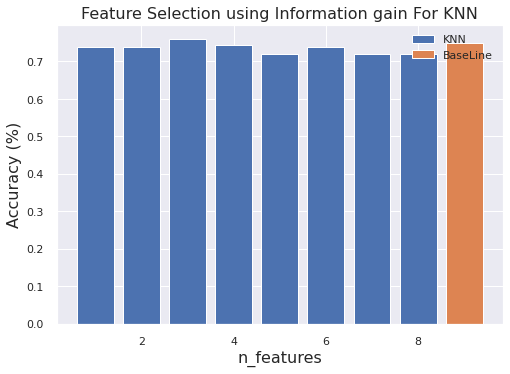

In [ ]:
plot2(KNN_test_acc,"Feature Selection using Information gain For KNN",Knn_test_scoree,"KNN")

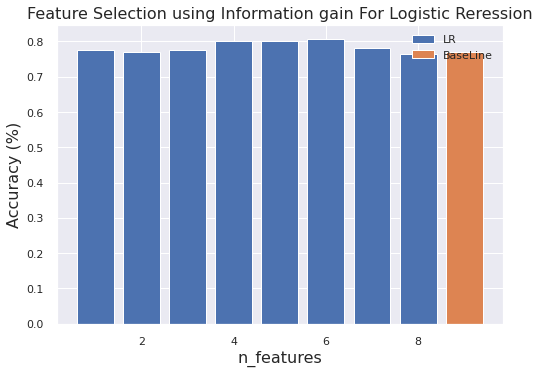

In [ ]:
plot2(Logistic_test_acc,"Feature Selection using Information gain For Logistic Reression",logistic_test_scoree,"LR")

#### TSNE Plot

##### KNN best features .


In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = best_n_for_Knn, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]
lstt=X.columns[sfs_selector.get_support()].tolist()
X_Features=df[lstt[0:best_n_for_Knn]]
X_trainK, X_testK, y_trainK, y_testK = train_test_split(X_Features, y, test_size=0.25, random_state=42)
Knn_clf = KNeighborsClassifier(n_neighbors = 2)
Knn_clf.fit(X_trainK, y_trainK)

KNeighborsClassifier(n_neighbors=2)

##### Tsne Plot for KNN Training 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


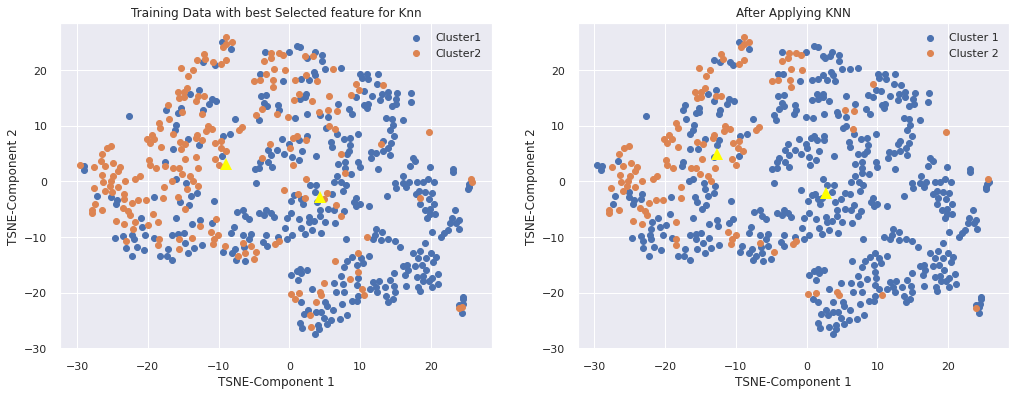

In [ ]:
plot_tsne(X_trainK,Knn_clf,y_trainK,"Training Data with best Selected feature for Knn","KNN")

##### Tsne Plot for KNN Testing 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


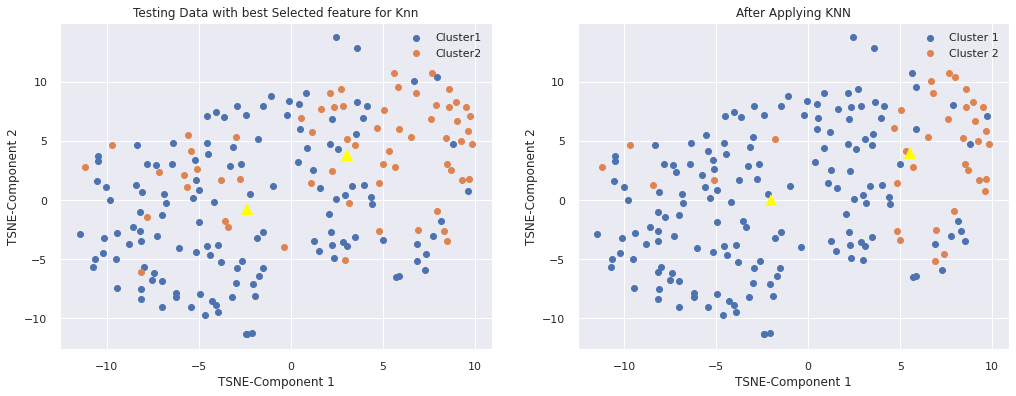

In [ ]:
plot_tsne(X_testK,Knn_clf,y_testK,"Testing Data with best Selected feature for Knn","KNN")

#### Logistic Regression
#####  best features.

In [ ]:
sfs_selector = SequentialFeatureSelector(estimator=LogisticRegression(), n_features_to_select = best_n_for_logistic, cv =10, direction ='backward')
sfs_selector.fit(X, y)
X.columns[sfs_selector.get_support()]
lstt=X.columns[sfs_selector.get_support()].tolist()
X_Features=df[lstt[0:best_n_for_logistic]]
X_trainL, X_testL, y_trainL, y_testL = train_test_split(X_Features, y, test_size=0.25, random_state=42)
logistic_clf = LogisticRegression()
logistic_clf.fit(X_trainL, y_trainL)

LogisticRegression()

##### TSNE Plot for Logistic Regression Training `

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


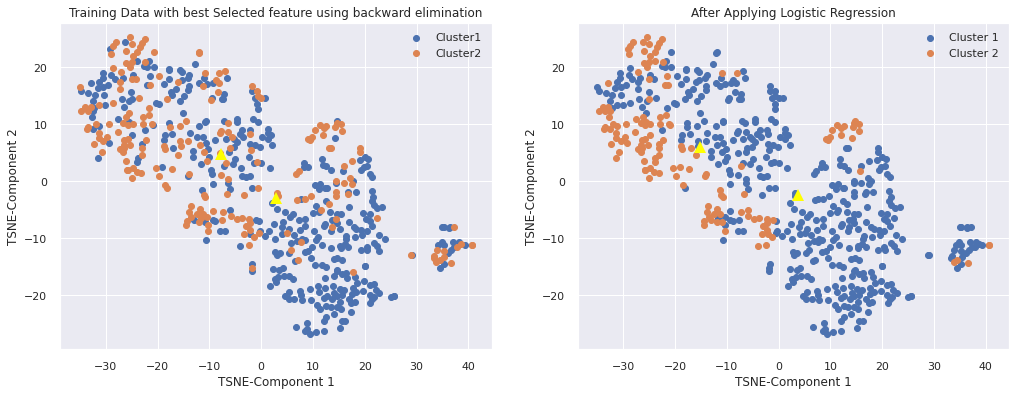

In [ ]:
plot_tsne(X_trainL,logistic_clf,y_trainL,"Training Data with best Selected feature using backward elimination","Logistic Regression")

##### TSNE Plot for Logistic Regression Testing 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


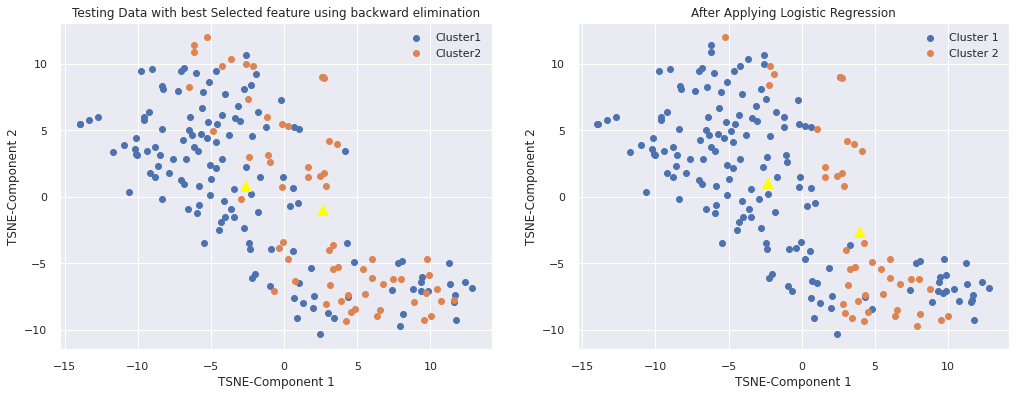

In [ ]:
plot_tsne(X_testL,logistic_clf,y_testL,"Testing Data with best Selected feature using backward elimination","Logistic Regression")

#*******************************

# Q5
##K-means with PCA

##Silhouette score vs the number of clusters

<b>Perform PCA with the chosen number of components.

In [ ]:
pca = PCA(n_components = 7)
pca.fit(X)
Pca_Data_transformed=pca.transform(X)

k_range = [2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans_per_k = []
for k in k_range:
    print("k={}".format(k))
    kmeans = KMeans(n_clusters=k, random_state=42).fit(Pca_Data_transformed)
    kmeans_per_k.append(kmeans)



k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10


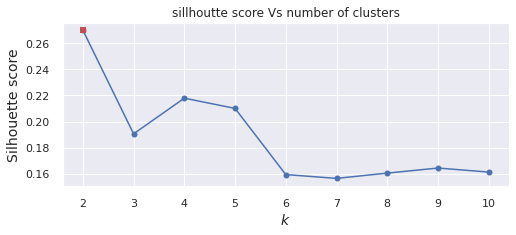

In [ ]:
silhouette_scores = [silhouette_score(Pca_Data_transformed, model.labels_)
                     for model in kmeans_per_k]
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]

plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title('sillhoutte score Vs number of clusters')
plt.plot(best_k, best_score, "rs")
plt.show()


##optimal number of clusters

In [ ]:
best_k

2

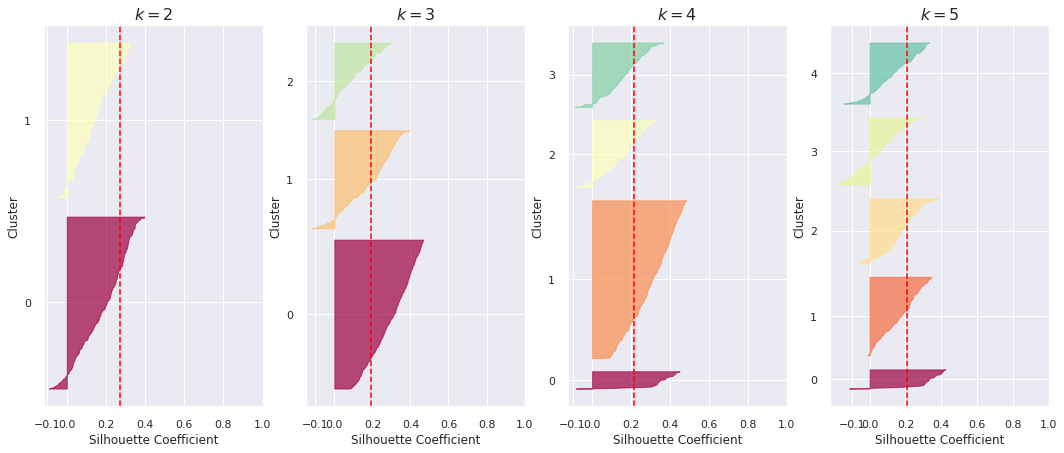

In [ ]:
plt.figure(figsize=(18, 7))

for k in (2,3, 4, 5):
    plt.subplot(1, 4, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(Pca_Data_transformed, y_pred)

    padding = len(Pca_Data_transformed) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2,3, 4,5):
        plt.ylabel("Cluster")
    
    if k in (2,3,4,5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
        
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
plt.show()

In [ ]:
silhouette_scores[0] 

0.2698891486952815

# Q6
 SOM Algorithm

In [ ]:
from sklearn.utils.multiclass import unique_labels
def silhoutte(data_points,ylabel):
  calc_silhouette=[]
  acc_list=[]
  #the next two def funtions are used to calculate the accuracy for unsupervised learning methods ONLY IF THE USED DATASET IS LABELD
  def unsupervisedLabelMap(labels, ylabel):
      labelDict = dict()
      for label in unique_labels(labels):
          tmpY = ylabel[labels == label]
          unique, count = np.unique(tmpY, return_counts=True)
          trueLabel = unique[np.argmax(count)]
          labelDict[label] = trueLabel
      return labelDict
  def usLabels2sLabels(labels, ylabel):
      sLabels = np.empty(labels.shape, labels.dtype)
      labelDict = unsupervisedLabelMap(labels, ylabel)
      for usl, tl in labelDict.items():
          sLabels[labels == usl] = tl
      return sLabels
      
  for i in range(2,31):

    som=SOM(m=i, n=1,dim=data_points.shape[1])
    predClusters=som.fit_predict(data_points)
    predY = usLabels2sLabels(predClusters, ylabel)
    accuracy = accuracy_score(ylabel, predY)
    score = silhouette_score(data_points, predClusters, random_state=0)
    calc_silhouette.append(score)
    acc_list.append(accuracy)
  plt.plot(range(2,31),calc_silhouette)
  plt.title('Silhouette score vs Numbers of Neurons')
  plt.xlabel('Numbers of Neurons')
  plt.ylabel('Silhouette score')
  return calc_silhouette


## Best n of Component from PCA Q3 
###is 7

In [ ]:
pca = PCA(n_components=7)
pca.fit(X)
Pca_Data_transformed_=pca.transform(X)

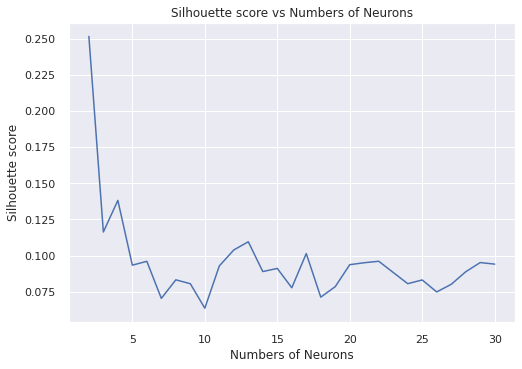

In [ ]:
silh_scoreLst=silhoutte(Pca_Data_transformed_,y)

In [ ]:
optimal_n_neuron=np.argmax(silh_scoreLst)+2
optimal_n_neuron

2

### Optimal number of neurons we get are 2 from best number of compnoent of PCA which is 7 at Q3.

##(c) Plot the initial and final Neuron positions

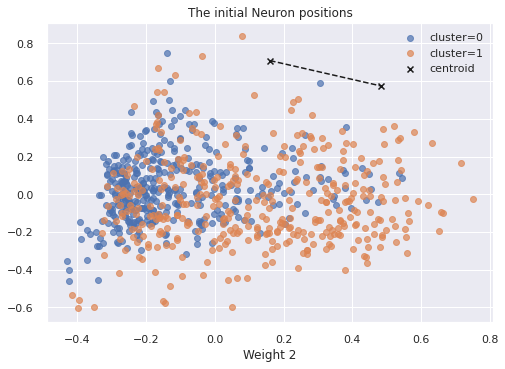

In [ ]:
# Initialization and training
som_shape = (1, 2)
som = MiniSom(som_shape[0],som_shape[1],Pca_Data_transformed_.shape[1] , sigma=0.3, learning_rate=0.5,random_seed=0)
winner_coordinates = np.array([som.winner(x) for x in Pca_Data_transformed_]).T

cluster_index = np.ravel_multi_index(winner_coordinates, (1,i))

for c in np.unique(cluster_index):
    plt.scatter(Pca_Data_transformed_[cluster_index == c, 0],
                Pca_Data_transformed_[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                 linewidths=5, color='k', label='centroid')
    plt.plot(centroid[:, 0], centroid[:, 1], marker='x',linestyle='dashed', color='k')
    
plt.title('The initial Neuron positions')
plt.xlabel('Weight 1')
plt.xlabel('Weight 2')
plt.legend();

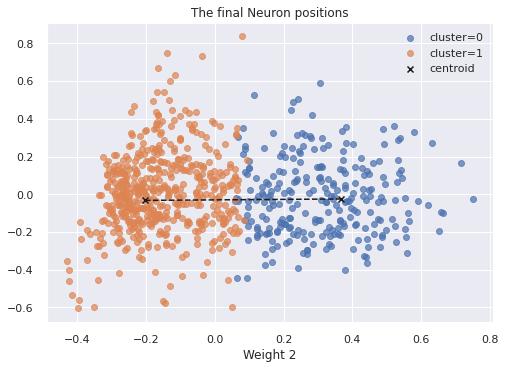

In [ ]:
som.train_batch(Pca_Data_transformed_, 1500)
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in Pca_Data_transformed_]).T

cluster_index = np.ravel_multi_index(winner_coordinates, (1,i))

for c in np.unique(cluster_index):
    plt.scatter(Pca_Data_transformed_[cluster_index == c, 0],
                Pca_Data_transformed_[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                 linewidths=5, color='k', label='centroid')
    plt.plot(centroid[:, 0], centroid[:, 1], marker='x',linestyle='dashed', color='k')
    
plt.title('The final Neuron positions')
plt.xlabel('Weight 1')
plt.xlabel('Weight 2')
plt.legend();

#Q7
##DBSCAN

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
sns.set()

In [ ]:
#find DBSCAN optimal eps and min-samples 

epsList, msList, silList, n_clusters = list(), list(), list(), list()

for eps in tqdm(np.arange(0.3, 0.7, 0.1)):
  for ms in range(2, 15,1):
    model = DBSCAN(eps=eps, min_samples=ms)
    predLabels = model.fit_predict(X)

    # Number of clusters in labels, ignoring noise if present.
    score = silhouette_score(X, predLabels, random_state=0)
    silList.append(score)
    epsList.append(eps)
    msList.append(ms)
    n_clusters.append(len(unique_labels(predLabels)))


100%|██████████| 4/4 [00:02<00:00,  1.51it/s]


In [ ]:
data={'Number of clusters':n_clusters,'Epsilon value':epsList, 'Min points': msList,'Silhouette Score': silList}

df=pd.DataFrame(data)

df

## The best 10 combinations

The best 10 combinations of epsilon and minpointswith the highest silhouette score.


In [ ]:
d = df.nlargest(10,['Silhouette Score'])
d

,Number of clusters,Epsilon value,Min points,Silhouette Score
28,2,0.5,4,0.485008
29,2,0.5,5,0.485008
30,2,0.5,6,0.485008
31,2,0.5,7,0.485008
46,2,0.6,9,0.485008
47,2,0.6,10,0.485008
48,2,0.6,11,0.485008
49,2,0.6,12,0.485008
50,2,0.6,13,0.485008
51,2,0.6,14,0.485008


## Epsilon vs Number of clusters

Epsilon vs Number of clusters the 10 best combination.

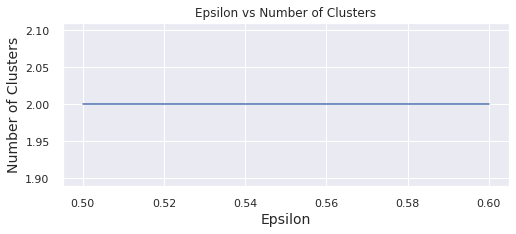

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(d['Epsilon value'], d['Number of clusters'])
plt.xlabel("Epsilon", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Epsilon vs Number of Clusters")
plt.show()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


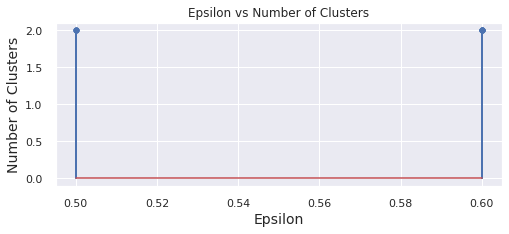

In [ ]:
plt.figure(figsize=(8, 3))
plt.stem(d['Epsilon value'], d['Number of clusters'])
plt.xlabel("Epsilon", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Epsilon vs Number of Clusters")
plt.show()

Epsilon vs Number of clusters for all combinations.

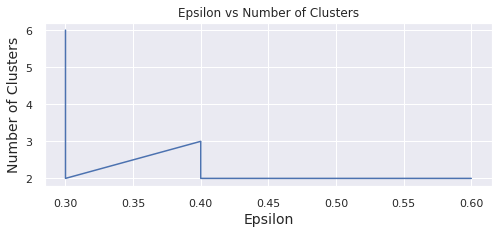

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(epsList, n_clusters)
plt.xlabel("Epsilon", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Epsilon vs Number of Clusters")
plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


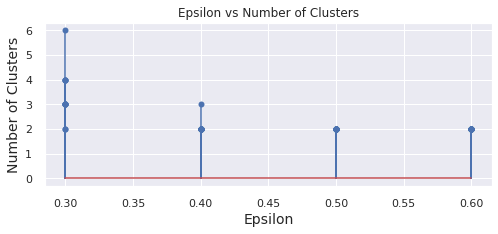

In [ ]:
plt.figure(figsize=(8, 3))
plt.stem(epsList, n_clusters)
plt.xlabel("Epsilon", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Epsilon vs Number of Clusters")
plt.show()


## Minpoints vs Number of clusters

Minpoints vs Number of clusters for the 10 best combination.

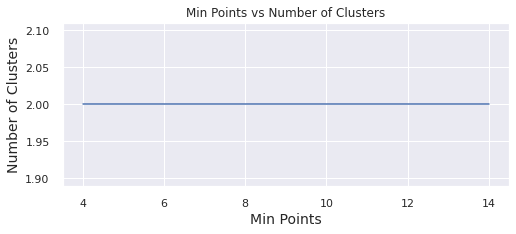

In [ ]:
# Line Plot
plt.figure(figsize=(8, 3))
plt.plot(d['Min points'],d['Number of clusters'])
plt.xlabel("Min Points", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Min Points vs Number of Clusters")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


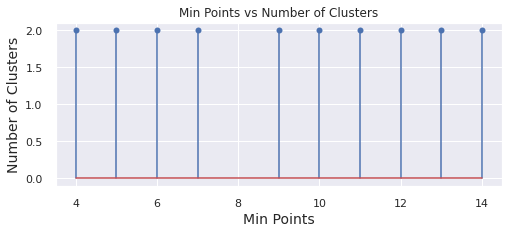

In [ ]:
# Line Plot
plt.figure(figsize=(8, 3))
plt.stem(d['Min points'],d['Number of clusters'])
plt.xlabel("Min Points", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Min Points vs Number of Clusters")
plt.show()

Epsilon vs Number of clusters for all combinations.

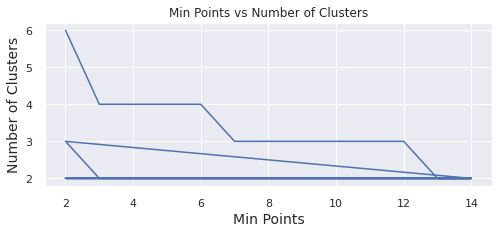

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(msList, n_clusters)
plt.xlabel("Min Points", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Min Points vs Number of Clusters")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


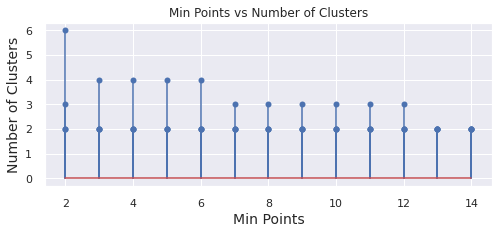

In [ ]:
plt.figure(figsize=(8, 3))
plt.stem(msList, n_clusters)
plt.xlabel("Min Points", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Min Points vs Number of Clusters")
plt.show()

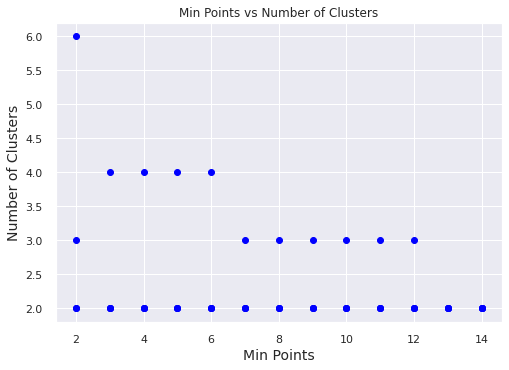

In [ ]:
# Scatter Plot
plt.scatter(msList, n_clusters, c ="blue")
plt.xlabel("Min Points", fontsize=14)
plt.ylabel("Number of Clusters", fontsize=14)
plt.title("Min Points vs Number of Clusters")
# To show the plot
plt.show()